In [ ]:
from google.colab import drives
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 경로 설정
import os
os.chdir('/content/drive/My Drive')

In [ ]:
# 케라스 FaceNet 모델 로드 예시
from keras.models import load_model
# 모델 불러오기
model = load_model('facenet_keras.h5')
# 입력과 출력 배열 형태 요약
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'input_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/batchnorm/add_1:0' shape=(None, 128) dtype=float32>]


In [ ]:
# 실습 시작 전 필수 설치 항목
!pip3 install keras mtcnn Pillow numpy opencv-python matplotlib sklearn

     |████████████████████████████████| 2.3MB 4.2MB/s 


In [ ]:
# MTCNN이 올바르게 설치되었는지 확인
import mtcnn
# 버전 출력
print(mtcnn.__version__)

0.1.0


1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


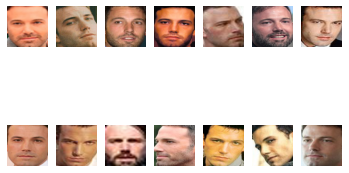

In [ ]:
# 5명의 유명인사 얼굴 데이터셋으로 얼굴 감지 표시하기
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

# 주어진 사진에서 하나의 얼굴 추출
def extract_face(filename, required_size=(160, 160)):
	# 파일에서 이미지 불러오기
	image = Image.open(filename)
	# RGB로 변환, 필요시
	image = image.convert('RGB')
	# 배열로 변환
	pixels = asarray(image)
	# 감지기 생성, 기본 가중치 이용
	detector = MTCNN()
	# 이미지에서 얼굴 감지
	results = detector.detect_faces(pixels)
	# 첫 번째 얼굴에서 경계 상자 추출
	x1, y1, width, height = results[0]['box']
	# 버그 수정
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# 얼굴 추출
	face = pixels[y1:y2, x1:x2]
	# 모델 사이즈로 픽셀 재조정
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# 폴더를 플롯으로 구체화하기
folder = '5-celebrity-faces-dataset/train/ben_afflek/'
i = 1
# 파일 열거
for filename in listdir(folder):
	# 경로
	path = folder + filename
	# 얼굴 추출
	face = extract_face(path)
	print(i, face.shape)
	# 플롯
	pyplot.subplot(2, 7, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()